In [1]:
import pandas as pd
import numpy as np

In [2]:
class Perceptron():
    def __init__(self, rychlost_ucenia=0.01, pocet_iteracii=30):
        self.eta = rychlost_ucenia 
        self.n_iter = pocet_iteracii      

    def fit(self, X,y):
        self.vahy = np.zeros(1+ X.shape[1])
        self.errors_=[]

        self.vahy_to_visualize_1=[]
        self.vahy_to_visualize_2=[]
        self.vahy_to_visualize_3=[]
        
        for i in range(self.n_iter):
            errors = 0
            for matica,vystup in zip(X,y):
                update = self.eta * (vystup-self.predikcia(matica))
                self.vahy[1:] += update*matica
                self.vahy[0]+= update
                
                print(self.vahy[1:])
                
                errors += int(update !=0.0)
            self.errors_.append(errors)   
            self.vahy_to_visualize_1.append(self.vahy[0])
            self.vahy_to_visualize_2.append(self.vahy[1])
            self.vahy_to_visualize_3.append(self.vahy[2])
        return self  
    def net_input(self, X):
        return np.dot(X, self.vahy[1:])+ self.vahy[0]

    def predikcia(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
df = pd.read_csv('optical_con.csv')

In [4]:
df

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,64,4,UN,Client-Server,"0,1","0,839546","1,974686","308,491814","700,514102","0,352431",NaN,NaN,NaN,NaN,NaN
1,64,4,UN,Client-Server,"0,2","0,827412","9,556437","291,037663","864,599227","0,506302",NaN,NaN,NaN,NaN,NaN
2,64,4,UN,Client-Server,"0,3","0,802605","27,027618","264,928002","839,372851","0,638516",NaN,NaN,NaN,NaN,NaN
3,64,4,UN,Client-Server,"0,4","0,723403","61,848511","235,776888","1256,053108","0,767051",NaN,NaN,NaN,NaN,NaN
4,64,4,UN,Client-Server,"0,5","0,72121","121,085884","189,680044","1343,875577","0,807812",NaN,NaN,NaN,NaN,NaN
5,64,4,UN,Client-Server,"0,6","0,647035","205,881088","145,988097","1574,366301","0,841771",NaN,NaN,NaN,NaN,NaN
6,64,4,UN,Client-Server,"0,7","0,567402","284,999115","118,323674","1974,853192","0,85033",NaN,NaN,NaN,NaN,NaN
7,64,4,UN,Client-Server,"0,8","0,511627","368,157288","92,003542","1845,521914","0,865625",NaN,NaN,NaN,NaN,NaN
8,64,4,UN,Client-Server,"0,9","0,47056","431,169037","80,43286","2605,196106","0,888828",NaN,NaN,NaN,NaN,NaN
9,64,4,UN,Client-Server,1,"0,421877","505,119598","68,518468","2586,130982","0,882552",NaN,NaN,NaN,NaN,NaN


In [5]:
#Výber potrebných dát na ďalšie spracovanie
df1=df[df["Spatial Distribution"]=="UN"]
df1

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,64,4,UN,Client-Server,"0,1","0,839546","1,974686","308,491814","700,514102","0,352431",NaN,NaN,NaN,NaN,NaN
1,64,4,UN,Client-Server,"0,2","0,827412","9,556437","291,037663","864,599227","0,506302",NaN,NaN,NaN,NaN,NaN
2,64,4,UN,Client-Server,"0,3","0,802605","27,027618","264,928002","839,372851","0,638516",NaN,NaN,NaN,NaN,NaN
3,64,4,UN,Client-Server,"0,4","0,723403","61,848511","235,776888","1256,053108","0,767051",NaN,NaN,NaN,NaN,NaN
4,64,4,UN,Client-Server,"0,5","0,72121","121,085884","189,680044","1343,875577","0,807812",NaN,NaN,NaN,NaN,NaN
5,64,4,UN,Client-Server,"0,6","0,647035","205,881088","145,988097","1574,366301","0,841771",NaN,NaN,NaN,NaN,NaN
6,64,4,UN,Client-Server,"0,7","0,567402","284,999115","118,323674","1974,853192","0,85033",NaN,NaN,NaN,NaN,NaN
7,64,4,UN,Client-Server,"0,8","0,511627","368,157288","92,003542","1845,521914","0,865625",NaN,NaN,NaN,NaN,NaN
8,64,4,UN,Client-Server,"0,9","0,47056","431,169037","80,43286","2605,196106","0,888828",NaN,NaN,NaN,NaN,NaN
9,64,4,UN,Client-Server,1,"0,421877","505,119598","68,518468","2586,130982","0,882552",NaN,NaN,NaN,NaN,NaN


In [6]:
ocistene =df1[['Spatial Distribution','Processor Utilization','Channel Utilization','Input Waiting Time','Channel Waiting Time']]
ocistene

,Spatial Distribution,Processor Utilization,Channel Utilization,Input Waiting Time,Channel Waiting Time
0,UN,"0,839546","0,352431","308,491814","1,974686"
1,UN,"0,827412","0,506302","291,037663","9,556437"
2,UN,"0,802605","0,638516","264,928002","27,027618"
3,UN,"0,723403","0,767051","235,776888","61,848511"
4,UN,"0,72121","0,807812","189,680044","121,085884"
5,UN,"0,647035","0,841771","145,988097","205,881088"
6,UN,"0,567402","0,85033","118,323674","284,999115"
7,UN,"0,511627","0,865625","92,003542","368,157288"
8,UN,"0,47056","0,888828","80,43286","431,169037"
9,UN,"0,421877","0,882552","68,518468","505,119598"


In [7]:
df2=df[df["Spatial Distribution"]=="HR"]
df2

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
40,64,4,HR,Client-Server,"0,1","0,549508","1,222985","327,044772","1327,334659","0,297951",NaN,NaN,NaN,NaN,NaN
41,64,4,HR,Client-Server,"0,2","0,509507","5,670937","328,113813","1501,504698","0,357118",NaN,NaN,NaN,NaN,NaN
42,64,4,HR,Client-Server,"0,3","0,531845","16,238094","303,152729","1517,024022","0,479036",NaN,NaN,NaN,NaN,NaN
43,64,4,HR,Client-Server,"0,4","0,519655","45,07972","279,317307","1455,789406","0,543299",NaN,NaN,NaN,NaN,NaN
44,64,4,HR,Client-Server,"0,5","0,515341","129,721649","198,615324","1881,893315","0,636632",NaN,NaN,NaN,NaN,NaN
45,64,4,HR,Client-Server,"0,6","0,452565","262,34314","117,981682","2090,345171","0,649635",NaN,NaN,NaN,NaN,NaN
46,64,4,HR,Client-Server,"0,7","0,381618","347,487946","96,904514","2511,787943","0,633707",NaN,NaN,NaN,NaN,NaN
47,64,4,HR,Client-Server,"0,8","0,355369","424,036957","72,491967","3071,20543","0,672917",NaN,NaN,NaN,NaN,NaN
48,64,4,HR,Client-Server,"0,9","0,32818","495,345062","64,535954","3621,956835","0,681484",NaN,NaN,NaN,NaN,NaN
49,64,4,HR,Client-Server,1,"0,282082","575,525146","51,514464","3681,474413","0,655035",NaN,NaN,NaN,NaN,NaN


In [8]:
ocistene2 =df2[['Spatial Distribution','Processor Utilization','Channel Utilization','Input Waiting Time','Channel Waiting Time']]
ocistene2

,Spatial Distribution,Processor Utilization,Channel Utilization,Input Waiting Time,Channel Waiting Time
40,HR,"0,549508","0,297951","327,044772","1,222985"
41,HR,"0,509507","0,357118","328,113813","5,670937"
42,HR,"0,531845","0,479036","303,152729","16,238094"
43,HR,"0,519655","0,543299","279,317307","45,07972"
44,HR,"0,515341","0,636632","198,615324","129,721649"
45,HR,"0,452565","0,649635","117,981682","262,34314"
46,HR,"0,381618","0,633707","96,904514","347,487946"
47,HR,"0,355369","0,672917","72,491967","424,036957"
48,HR,"0,32818","0,681484","64,535954","495,345062"
49,HR,"0,282082","0,655035","51,514464","575,525146"


In [9]:
df3=df[df["Spatial Distribution"]=="PS"]
df3

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
120,64,4,PS,Client-Server,"0,1","0,828573","1,934532","281,991851","0,52921","607,869882",NaN,NaN,NaN,NaN,NaN
121,64,4,PS,Client-Server,"0,2","0,824084","9,5502","262,127869","0,633802","902,966929",NaN,NaN,NaN,NaN,NaN
122,64,4,PS,Client-Server,"0,3","0,795685","26,33913","239,734762","0,718047","1042,409722",NaN,NaN,NaN,NaN,NaN
123,64,4,PS,Client-Server,"0,4","0,739597","56,360073","230,163026","0,778299","1219,612435",NaN,NaN,NaN,NaN,NaN
124,64,4,PS,Client-Server,"0,5","0,695053","126,209816","176,588953","0,822266","1202,936709",NaN,NaN,NaN,NaN,NaN
125,64,4,PS,Client-Server,"0,6","0,62477","203,292633","142,07526","0,846927","1688,953232",NaN,NaN,NaN,NaN,NaN
126,64,4,PS,Client-Server,"0,7","0,541929","287,763733","121,877978","0,84079","1904,053095",NaN,NaN,NaN,NaN,NaN
127,64,4,PS,Client-Server,"0,8","0,487871","351,338531","107,055717","0,857222","2191,738331",NaN,NaN,NaN,NaN,NaN
128,64,4,PS,Client-Server,"0,9","0,43976","420,470581","95,21403","0,86","2752,001151",NaN,NaN,NaN,NaN,NaN
129,64,4,PS,Client-Server,1,"0,400416","500,004944","77,396653","0,865191","2895,323131",NaN,NaN,NaN,NaN,NaN


In [10]:
ocistene3 =df3[['Spatial Distribution','Processor Utilization','Channel Utilization','Input Waiting Time','Channel Waiting Time']]
ocistene3

,Spatial Distribution,Processor Utilization,Channel Utilization,Input Waiting Time,Channel Waiting Time
120,PS,"0,828573","607,869882","281,991851","1,934532"
121,PS,"0,824084","902,966929","262,127869","9,5502"
122,PS,"0,795685","1042,409722","239,734762","26,33913"
123,PS,"0,739597","1219,612435","230,163026","56,360073"
124,PS,"0,695053","1202,936709","176,588953","126,209816"
125,PS,"0,62477","1688,953232","142,07526","203,292633"
126,PS,"0,541929","1904,053095","121,877978","287,763733"
127,PS,"0,487871","2191,738331","107,055717","351,338531"
128,PS,"0,43976","2752,001151","95,21403","420,470581"
129,PS,"0,400416","2895,323131","77,396653","500,004944"


In [11]:
#ocistene.to_excel('ocistene1.xlsx', sheet_name='sheet1', index=False)
#ocistene2.to_excel('ocistene2.xlsx', sheet_name='sheet1', index=False)
#ocistene3.to_excel('ocistene3.xlsx', sheet_name='sheet1', index=False)

In [12]:
#súbory spojené manuálne
#načítanie výsledného očisteného súboru s dátami
df5 = pd.read_csv('lukas.txt', header=None)
df5

,0,1,2,3,4
0,UN,0.839546,0.352431,308.491814,1.974686
1,UN,0.827412,0.506302,291.037663,9.556437
2,UN,0.802605,0.638516,264.928002,27.027618
3,UN,0.723403,0.767051,235.776888,61.848511
4,UN,0.721210,0.807812,189.680044,121.085884
5,UN,0.647035,0.841771,145.988097,205.881088
6,UN,0.567402,0.850330,118.323674,284.999115
7,UN,0.511627,0.865625,92.003542,368.157288
8,UN,0.470560,0.888828,80.432860,431.169037
9,UN,0.421877,0.882552,68.518468,505.119598


In [13]:
X = df5.iloc[0:479, [1,2]].values
y = df5.iloc[0:479, 0].values

y = np.where(y == 'UN', -1, 1)
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [14]:
moj_perceptron = Perceptron()
moj_perceptron.fit(X,y)

[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092 -0.00704862]
[-0.01679092

[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00605276]
[0.00438938 0.00

[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138  0.00496316]
[-0.00141138

[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023  -0.00208546]
[-0.0182023 

[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306 -0.00317506]
[-0.02400306

[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129   0.00278396]
[-0.0130129 

[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366  0.00169436]
[-0.01881366

[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442  0.00060476]
[-0.02461442

[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158 -0.00404906]
[-0.04101158

[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678  0.01497106]
[-0.01573678

[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112  0.00475902]
[-0.02456112

[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-0.02860928 -0.00683926]
[-1.20378200e-02  1.21505584e+01]
[-1.20378200e-02  1.21505584e+01]
[-1.20378200e-02  1.21505584e+01]
[-1.20378200e-02  1.21505584e+01]
[-1.20378200e-02  1.21505584e+01]
[-1.20378200e-02  1.21505584e+01]
[-1.20378200e-02  1.21505584e+01]
[-1.20378200e-02  1.21505584e+01]
[-1.20378200e-02  1.21505584e+01]
[-1.20378200e-02  1.21505584e+01]
[-1.203782

[-2.19793442  9.73451948]
[-2.21551114  9.72029448]
[-2.23323168  9.7036917 ]
[-2.25017014  9.68570212]
[-2.26527764  9.66717296]
[-2.278157    9.64898754]
[-2.28987984  9.63038198]
[-2.30065016  9.61165074]
[-2.31048242  9.5928313 ]
[-2.29949226  9.59879032]
[-2.28930212  9.60593268]
[-2.28930212  9.60593268]
[-2.28930212  9.60593268]
[-2.28930212  9.60593268]
[-2.28930212  9.60593268]
[-2.28930212  9.60593268]
[-2.28930212  9.60593268]
[-2.28930212  9.60593268]
[-2.28930212  9.60593268]
[-2.27785764  9.61215126]
[-2.26671216  9.62002556]
[-2.26671216  9.62002556]
[-2.26671216  9.62002556]
[-2.26671216  9.62002556]
[-2.26671216  9.62002556]
[-2.26671216  9.62002556]
[-2.26671216  9.62002556]
[-2.26671216  9.62002556]
[-2.26671216  9.62002556]
[-2.25536588  9.62533424]
[-2.24332616  9.63347486]
[-2.24332616  9.63347486]
[-2.24332616  9.63347486]
[-2.24332616  9.63347486]
[-2.24332616  9.63347486]
[-2.24332616  9.63347486]
[-2.24332616  9.63347486]
[-2.24332616  9.63347486]
[-2.24332616

[-2.87192228  8.68811796]
[-2.88171476  8.66906066]
[-2.88171476  8.66906066]
[-2.88171476  8.66906066]
[-2.89877218  8.65346482]
[-2.91405148  8.63756482]
[-2.92864036  8.6210058 ]
[-2.94115204  8.60385996]
[-2.9523583  8.5862919]
[-2.96298814  8.56830856]
[-2.97251278  8.55012106]
[-2.98099228  8.53259328]
[-2.98099228  8.53259328]
[-2.98099228  8.53259328]
[-2.98099228  8.53259328]
[-2.99821952  8.51601272]
[-3.01406006  8.49866202]
[-3.02816636  8.48082036]
[-3.04090862  8.46245994]
[-3.0522168   8.44404328]
[-3.0623367   8.42596828]
[-3.07144804  8.40793356]
[-3.07144804  8.40793356]
[-3.07144804  8.40793356]
[-3.07144804  8.40793356]
[-3.07144804  8.40793356]
[-3.08834928  8.38989536]
[-3.10302238  8.3717537 ]
[-3.11626142  8.35319398]
[-3.12799116  8.33453842]
[-3.13882692  8.31561968]
[-3.1486351   8.29670996]
[-3.1486351   8.29670996]
[-3.1486351   8.29670996]
[-3.1486351   8.29670996]
[-3.1486351   8.29670996]
[-3.16629138  8.27824122]
[-3.18173012  8.25949956]
[-3.19547624  

[-2.32032168  8.82596026]
[-2.32032168  8.82596026]
[-2.32032168  8.82596026]
[-2.32032168  8.82596026]
[-2.32032168  8.82596026]
[-2.32032168  8.82596026]
[-2.32032168  8.82596026]
[-2.33637378  8.81318994]
[-2.35084184  8.79784892]
[-2.36526604  8.78169268]
[-2.37820674  8.76485726]
[-2.38955478  8.74785066]
[-2.39978732  8.73053816]
[-2.40919852  8.7127616 ]
[-2.41763606  8.69511056]
[-2.41763606  8.69511056]
[-2.41763606  8.69511056]
[-2.4350752   8.68196316]
[-2.45215212  8.6665076 ]
[-2.46808068  8.64945638]
[-2.48271626  8.6312418 ]
[-2.49552048  8.61291662]
[-2.50689894  8.59442496]
[-2.51717986  8.57579528]
[-2.52644276  8.55717376]
[-2.52644276  8.55717376]
[-2.52644276  8.55717376]
[-2.54502014  8.54351282]
[-2.56325236  8.52733226]
[-2.58026788  8.50955274]
[-2.5956462  8.4908767]
[-2.60911182  8.47206056]
[-2.62114372  8.45302722]
[-2.63190688  8.4339116 ]
[-2.64167182  8.41470848]
[-2.64167182  8.41470848]
[-2.64167182  8.41470848]
[-2.64167182  8.41470848]
[-2.66037126  

[-2.55029694  8.14828132]
[-2.53157144  8.15944278]
[-2.53157144  8.15944278]
[-2.53157144  8.15944278]
[-2.53157144  8.15944278]
[-2.53157144  8.15944278]
[-2.53157144  8.15944278]
[-2.53157144  8.15944278]
[-2.53157144  8.15944278]
[-2.53157144  8.15944278]
[-2.51244058  8.1671617 ]
[-2.49314464  8.17815268]
[-2.49314464  8.17815268]
[-2.49314464  8.17815268]
[-2.49314464  8.17815268]
[-2.49314464  8.17815268]
[-2.49314464  8.17815268]
[-2.49314464  8.17815268]
[-2.49314464  8.17815268]
[-2.49314464  8.17815268]
[-2.47739058  8.18705146]
[-2.46195518  8.19789208]
[-2.46195518  8.19789208]
[-2.46195518  8.19789208]
[-2.46195518  8.19789208]
[-2.46195518  8.19789208]
[-2.46195518  8.19789208]
[-2.46195518  8.19789208]
[-2.46195518  8.19789208]
[-2.46195518  8.19789208]
[-2.4444116   8.20632506]
[-2.42737494  8.21699798]
[-2.42737494  8.21699798]
[-2.42737494  8.21699798]
[-2.42737494  8.21699798]
[-2.42737494  8.21699798]
[-2.42737494  8.21699798]
[-2.42737494  8.21699798]
[-2.42737494

[-2.48842274  7.6532871 ]
[-2.47012926  7.66518398]
[-2.47012926  7.66518398]
[-2.47012926  7.66518398]
[-2.47012926  7.66518398]
[-2.47012926  7.66518398]
[-2.47012926  7.66518398]
[-2.47012926  7.66518398]
[-2.47012926  7.66518398]
[-2.47012926  7.66518398]
[-2.45118466  7.67333554]
[-2.43245916  7.684497  ]
[-2.43245916  7.684497  ]
[-2.43245916  7.684497  ]
[-2.43245916  7.684497  ]
[-2.43245916  7.684497  ]
[-2.43245916  7.684497  ]
[-2.43245916  7.684497  ]
[-2.43245916  7.684497  ]
[-2.43245916  7.684497  ]
[-2.4133283   7.69221592]
[-2.39403236  7.7032069 ]
[-2.39403236  7.7032069 ]
[-2.39403236  7.7032069 ]
[-2.39403236  7.7032069 ]
[-2.39403236  7.7032069 ]
[-2.39403236  7.7032069 ]
[-2.39403236  7.7032069 ]
[-2.39403236  7.7032069 ]
[-2.39403236  7.7032069 ]
[-2.3782783   7.71210568]
[-2.3628429  7.7229463]
[-2.3628429  7.7229463]
[-2.3628429  7.7229463]
[-2.3628429  7.7229463]
[-2.3628429  7.7229463]
[-2.3628429  7.7229463]
[-2.3628429  7.7229463]
[-2.3628429  7.7229463]
[-

[-2.41649278  7.16897534]
[-2.41649278  7.16897534]
[-2.41649278  7.16897534]
[-2.41649278  7.16897534]
[-2.41649278  7.16897534]
[-2.41649278  7.16897534]
[-2.41649278  7.16897534]
[-2.41649278  7.16897534]
[-2.41649278  7.16897534]
[-2.41649278  7.16897534]
[-2.41649278  7.16897534]
[-2.41649278  7.16897534]
[-2.41649278  7.16897534]
[-2.41649278  7.16897534]
[-2.39793506  7.17835832]
[-2.37964158  7.1902552 ]
[-2.37964158  7.1902552 ]
[-2.37964158  7.1902552 ]
[-2.37964158  7.1902552 ]
[-2.37964158  7.1902552 ]
[-2.37964158  7.1902552 ]
[-2.37964158  7.1902552 ]
[-2.37964158  7.1902552 ]
[-2.37964158  7.1902552 ]
[-2.36069698  7.19840676]
[-2.34197148  7.20956822]
[-2.34197148  7.20956822]
[-2.34197148  7.20956822]
[-2.34197148  7.20956822]
[-2.34197148  7.20956822]
[-2.34197148  7.20956822]
[-2.34197148  7.20956822]
[-2.34197148  7.20956822]
[-2.34197148  7.20956822]
[-2.32284062  7.21728714]
[-2.30354468  7.22827812]
[-2.30354468  7.22827812]
[-2.30354468  7.22827812]
[-2.30354468

[-2.45524958  6.6134223 ]
[-2.45524958  6.6134223 ]
[-2.45524958  6.6134223 ]
[-2.45524958  6.6134223 ]
[-2.45524958  6.6134223 ]
[-2.45524958  6.6134223 ]
[-2.45524958  6.6134223 ]
[-2.45524958  6.6134223 ]
[-2.45524958  6.6134223 ]
[-2.4394767  6.6227473]
[-2.4225347   6.63526814]
[-2.40660236  6.6486598 ]
[-2.40660236  6.6486598 ]
[-2.40660236  6.6486598 ]
[-2.40660236  6.6486598 ]
[-2.40660236  6.6486598 ]
[-2.40660236  6.6486598 ]
[-2.40660236  6.6486598 ]
[-2.40660236  6.6486598 ]
[-2.38961488  6.65857646]
[-2.37255336  6.6704098 ]
[-2.37255336  6.6704098 ]
[-2.37255336  6.6704098 ]
[-2.37255336  6.6704098 ]
[-2.37255336  6.6704098 ]
[-2.37255336  6.6704098 ]
[-2.37255336  6.6704098 ]
[-2.37255336  6.6704098 ]
[-2.37255336  6.6704098 ]
[-2.3611098   6.67993618]
[-2.3611098   6.67993618]
[-2.3611098   6.67993618]
[-2.3611098   6.67993618]
[-2.3611098   6.67993618]
[-2.3611098   6.67993618]
[-2.3611098   6.67993618]
[-2.3611098   6.67993618]
[-2.3611098   6.67993618]
[-2.3611098   

[-2.76940974  5.81240084]
[-2.76940974  5.81240084]
[-2.76940974  5.81240084]
[-2.76940974  5.81240084]
[-2.76940974  5.81240084]
[-2.76940974  5.81240084]
[-2.76940974  5.81240084]
[-2.782152    5.79404042]
[-2.79346018  5.77562376]
[-2.80358008  5.75754876]
[-2.81269142  5.73951404]
[-2.81269142  5.73951404]
[-2.81269142  5.73951404]
[-2.81269142  5.73951404]
[-2.81269142  5.73951404]
[-2.81269142  5.73951404]
[-2.81269142  5.73951404]
[-2.82593046  5.72095432]
[-2.8376602   5.70229876]
[-2.84849596  5.68338002]
[-2.85830414  5.6644703 ]
[-2.85830414  5.6644703 ]
[-2.85830414  5.6644703 ]
[-2.85830414  5.6644703 ]
[-2.85830414  5.6644703 ]
[-2.85830414  5.6644703 ]
[-2.85830414  5.6644703 ]
[-2.85830414  5.6644703 ]
[-2.87064428  5.64528696]
[-2.88167436  5.62617446]
[-2.8917462   5.60708418]
[-2.8917462   5.60708418]
[-2.8917462   5.60708418]
[-2.8917462   5.60708418]
[-2.8917462   5.60708418]
[-2.8917462   5.60708418]
[-2.8917462   5.60708418]
[-2.8917462   5.60708418]
[-2.8917462 

[-1.88476052  6.44022302]
[-1.88476052  6.44022302]
[-1.88476052  6.44022302]
[-1.88476052  6.44022302]
[-1.88476052  6.44022302]
[-1.88476052  6.44022302]
[-1.88476052  6.44022302]
[-1.88476052  6.44022302]
[-1.88476052  6.44022302]
[-1.88476052  6.44022302]
[-1.86520608  6.45135428]
[-1.86520608  6.45135428]
[-1.86520608  6.45135428]
[-1.86520608  6.45135428]
[-1.86520608  6.45135428]
[-1.86520608  6.45135428]
[-1.86520608  6.45135428]
[-1.86520608  6.45135428]
[-1.86520608  6.45135428]
[-1.86520608  6.45135428]
[-1.86520608  6.45135428]
[-1.88125818  6.43858396]
[-1.89572624  6.42324294]
[-1.91015044  6.4070867 ]
[-1.92309114  6.39025128]
[-1.93443918  6.37324468]
[-1.94467172  6.35593218]
[-1.95408292  6.33815562]
[-1.96252046  6.32050458]
[-1.96252046  6.32050458]
[-1.96252046  6.32050458]
[-1.9799596   6.30735718]
[-1.99703652  6.29190162]
[-2.01296508  6.2748504 ]
[-2.02760066  6.25663582]
[-2.04040488  6.23831064]
[-2.05178334  6.21981898]
[-2.06206426  6.2011893 ]
[-2.07132716

[-1.9701442   5.89724094]
[-1.9701442   5.89724094]
[-1.9701442   5.89724094]
[-1.9701442   5.89724094]
[-1.9701442   5.89724094]
[-1.95439014  5.90613972]
[-1.93895474  5.91698034]
[-1.93895474  5.91698034]
[-1.93895474  5.91698034]
[-1.93895474  5.91698034]
[-1.93895474  5.91698034]
[-1.93895474  5.91698034]
[-1.93895474  5.91698034]
[-1.93895474  5.91698034]
[-1.93895474  5.91698034]
[-1.92141116  5.92541332]
[-1.9043745   5.93608624]
[-1.9043745   5.93608624]
[-1.9043745   5.93608624]
[-1.9043745   5.93608624]
[-1.9043745   5.93608624]
[-1.9043745   5.93608624]
[-1.9043745   5.93608624]
[-1.9043745   5.93608624]
[-1.9043745   5.93608624]
[-1.88607234  5.9439418 ]
[-1.86769988  5.955005  ]
[-1.86769988  5.955005  ]
[-1.86769988  5.955005  ]
[-1.86769988  5.955005  ]
[-1.86769988  5.955005  ]
[-1.86769988  5.955005  ]
[-1.86769988  5.955005  ]
[-1.86769988  5.955005  ]
[-1.86769988  5.955005  ]
[-1.8490902   5.96289546]
[-1.83024622  5.9739097 ]
[-1.83024622  5.9739097 ]
[-1.83024622

[-1.86939146  5.47866998]
[-1.86939146  5.47866998]
[-1.86939146  5.47866998]
[-1.8536374   5.48756876]
[-1.838202    5.49840938]
[-1.838202    5.49840938]
[-1.838202    5.49840938]
[-1.838202    5.49840938]
[-1.838202    5.49840938]
[-1.838202    5.49840938]
[-1.838202    5.49840938]
[-1.838202    5.49840938]
[-1.838202    5.49840938]
[-1.82065842  5.50684236]
[-1.80362176  5.51751528]
[-1.80362176  5.51751528]
[-1.80362176  5.51751528]
[-1.80362176  5.51751528]
[-1.80362176  5.51751528]
[-1.80362176  5.51751528]
[-1.80362176  5.51751528]
[-1.80362176  5.51751528]
[-1.80362176  5.51751528]
[-1.7853196   5.52537084]
[-1.76694714  5.53643404]
[-1.76694714  5.53643404]
[-1.76694714  5.53643404]
[-1.76694714  5.53643404]
[-1.76694714  5.53643404]
[-1.76694714  5.53643404]
[-1.76694714  5.53643404]
[-1.76694714  5.53643404]
[-1.76694714  5.53643404]
[-1.74833746  5.5443245 ]
[-1.72949348  5.55533874]
[-1.72949348  5.55533874]
[-1.72949348  5.55533874]
[-1.72949348  5.55533874]
[-1.72949348

[-2.23177954  4.69298072]
[-2.23177954  4.69298072]
[-2.22340712  4.6994946 ]
[-2.2151224   4.70692134]
[-2.20724454  4.71548644]
[-2.19964004  4.72540102]
[-2.19280474  4.73518748]
[-2.18642792  4.7463979 ]
[-2.18105722  4.75653454]
[-2.1761979   4.76701926]
[-2.17176712  4.77747394]
[-2.16771958  4.78766318]
[-2.1586632   4.79437568]
[-2.15033338  4.80238506]
[-2.14222558  4.8109085 ]
[-2.13425516  4.8212328 ]
[-2.13425516  4.8212328 ]
[-2.13425516  4.8212328 ]
[-2.13425516  4.8212328 ]
[-2.13425516  4.8212328 ]
[-2.13425516  4.8212328 ]
[-2.13425516  4.8212328 ]
[-2.12372468  4.82909444]
[-2.1142636  4.8374295]
[-2.1053177   4.84778836]
[-2.09653258  4.8583217 ]
[-2.09653258  4.8583217 ]
[-2.09653258  4.8583217 ]
[-2.09653258  4.8583217 ]
[-2.09653258  4.8583217 ]
[-2.09653258  4.8583217 ]
[-2.09653258  4.8583217 ]
[-2.08647188  4.86596302]
[-2.07682336  4.874671  ]
[-2.06723446  4.8846684 ]
[-2.06723446  4.8846684 ]
[-2.06723446  4.8846684 ]
[-2.06723446  4.8846684 ]
[-2.06723446  

[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.4317991  3.9919024]
[-2.42080894  3.99786142]
[-2.4106188   4.00500378]
[-2.3999819  4.0145845]
[-2.3895888   4.02545048]
[-2.37928198  4.03818312]
[-2.37023068  4.05117582]
[-2.36259832  4.06384996]
[-2.35549094  4.0773083 ]
[-2.34892734  4.09093798]
[-2.3432857   4.10403868]
[-2.33184122  4.11025726]
[-2.32069574  4.11813156]
[-2.30899138  4.1281352 ]
[-2.29716288  4.14055326]
[-2.2860137   4.15411576]
[-2.27566716  4.16853868]
[-2.26649954  4.1831135 ]
[-2.25847168  4.19767878]
[-2.25847168  4.19767878]
[-2.25847168  4.19767878]
[-2.2471254   4.20298746]
[-2.23508568  4.21112808

[-1.96019186  4.21748514]
[-1.97268794  4.20073098]
[-1.9839057   4.18363446]
[-1.99360056  4.16689418]
[-2.00256804  4.14961136]
[-2.01066788  4.1324499 ]
[-2.01066788  4.1324499 ]
[-2.01066788  4.1324499 ]
[-2.01066788  4.1324499 ]
[-2.02649634  4.11557844]
[-2.04221686  4.09831368]
[-2.05643488  4.08041992]
[-2.06865814  4.06264162]
[-2.07945282  4.04482772]
[-2.08927452  4.02671522]
[-2.0981353   4.00859542]
[-2.0981353   4.00859542]
[-2.0981353   4.00859542]
[-2.0981353   4.00859542]
[-2.0981353   4.00859542]
[-2.0981353   4.00859542]
[-2.11303208  3.99029646]
[-2.12629576  3.9715994 ]
[-2.1379927   3.95292996]
[-2.14838662  3.9342659 ]
[-2.15779742  3.91553846]
[-2.15779742  3.91553846]
[-2.15779742  3.91553846]
[-2.15779742  3.91553846]
[-2.15779742  3.91553846]
[-2.15779742  3.91553846]
[-2.15779742  3.91553846]
[-2.17144058  3.89658012]
[-2.18352266  3.87756206]
[-2.194303    3.85855112]
[-2.20409548  3.83949382]
[-2.20409548  3.83949382]
[-2.20409548  3.83949382]
[-2.20409548

[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.4366241   4.38082936]
[-1.45317234  4.37070332]
[-1.46922444  4.357933  ]
[-1.4836925   4.34259198]
[-1.4981167   4.32643574]
[-1.5110574 

[-1.44269404  3.97824962]
[-1.42515046  3.9866826 ]
[-1.42515046  3.9866826 ]
[-1.42515046  3.9866826 ]
[-1.42515046  3.9866826 ]
[-1.42515046  3.9866826 ]
[-1.42515046  3.9866826 ]
[-1.42515046  3.9866826 ]
[-1.42515046  3.9866826 ]
[-1.42515046  3.9866826 ]
[-1.42515046  3.9866826 ]
[-1.4068483   3.99453816]
[-1.4068483   3.99453816]
[-1.4068483   3.99453816]
[-1.4068483   3.99453816]
[-1.4068483   3.99453816]
[-1.4068483   3.99453816]
[-1.4068483   3.99453816]
[-1.4068483   3.99453816]
[-1.4068483   3.99453816]
[-1.4068483   3.99453816]
[-1.38823862  4.00242862]
[-1.38823862  4.00242862]
[-1.38823862  4.00242862]
[-1.38823862  4.00242862]
[-1.38823862  4.00242862]
[-1.38823862  4.00242862]
[-1.38823862  4.00242862]
[-1.38823862  4.00242862]
[-1.38823862  4.00242862]
[-1.38823862  4.00242862]
[-1.38823862  4.00242862]
[-1.38823862  4.00242862]
[-1.38823862  4.00242862]
[-1.38823862  4.00242862]
[-1.38823862  4.00242862]
[-1.38823862  4.00242862]
[-1.38823862  4.00242862]
[-1.38823862

[-1.36124592  3.62257986]
[-1.36124592  3.62257986]
[-1.34549186  3.63147864]
[-1.34549186  3.63147864]
[-1.34549186  3.63147864]
[-1.34549186  3.63147864]
[-1.34549186  3.63147864]
[-1.34549186  3.63147864]
[-1.34549186  3.63147864]
[-1.34549186  3.63147864]
[-1.34549186  3.63147864]
[-1.34549186  3.63147864]
[-1.32794828  3.63991162]
[-1.32794828  3.63991162]
[-1.32794828  3.63991162]
[-1.32794828  3.63991162]
[-1.32794828  3.63991162]
[-1.32794828  3.63991162]
[-1.32794828  3.63991162]
[-1.32794828  3.63991162]
[-1.32794828  3.63991162]
[-1.32794828  3.63991162]
[-1.30964612  3.64776718]
[-1.30964612  3.64776718]
[-1.30964612  3.64776718]
[-1.30964612  3.64776718]
[-1.30964612  3.64776718]
[-1.30964612  3.64776718]
[-1.30964612  3.64776718]
[-1.30964612  3.64776718]
[-1.30964612  3.64776718]
[-1.30964612  3.64776718]
[-1.29103644  3.65565764]
[-1.29103644  3.65565764]
[-1.29103644  3.65565764]
[-1.29103644  3.65565764]
[-1.29103644  3.65565764]
[-1.29103644  3.65565764]
[-1.29103644

[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.39684392  3.21339034]
[-1.380782    3.22438686]
[-1.380782    3.22438686]
[-1.380782    3.22438686]
[-1.380782    3.22438686]
[-1.380782    3.22438686]
[-1.380782    3.22438686]
[-1.380782    3.22438686]
[-1.380782    3.22438686]
[-1.380782    3.22438686]
[-1.380782    3.22438686]
[-1.36615742  3.23436324]
[-1.36615742  3.23436324]
[-1.36615742  3.23436324]
[-1.36615742  3.23436324]
[-1.36615742  3.23436324]
[-1.36615742  3.23436324]
[-1.36615742  3.23436324]
[-1.36615742  3.23436324]
[-1.36615742  3.23436324]
[-1.36615742

[-1.37169362  2.86005116]
[-1.37169362  2.86005116]
[-1.37169362  2.86005116]
[-1.37169362  2.86005116]
[-1.35592074  2.86937616]
[-1.35592074  2.86937616]
[-1.35592074  2.86937616]
[-1.35592074  2.86937616]
[-1.35592074  2.86937616]
[-1.35592074  2.86937616]
[-1.35592074  2.86937616]
[-1.35592074  2.86937616]
[-1.35592074  2.86937616]
[-1.35592074  2.86937616]
[-1.33893326  2.87929282]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174  2.89112616]
[-1.32187174

[-1.45231344  2.42441324]
[-1.45231344  2.42441324]
[-1.45231344  2.42441324]
[-1.45231344  2.42441324]
[-1.43961564  2.43058546]
[-1.4271091   2.43861566]
[-1.41402794  2.44980056]
[-1.40076854  2.46309084]
[-1.40076854  2.46309084]
[-1.40076854  2.46309084]
[-1.40076854  2.46309084]
[-1.40076854  2.46309084]
[-1.40076854  2.46309084]
[-1.40076854  2.46309084]
[-1.39239612  2.46960472]
[-1.3841114   2.47703146]
[-1.37623354  2.48559656]
[-1.36862904  2.49551114]
[-1.36862904  2.49551114]
[-1.36862904  2.49551114]
[-1.36862904  2.49551114]
[-1.36862904  2.49551114]
[-1.36862904  2.49551114]
[-1.36862904  2.49551114]
[-1.35957266  2.50222364]
[-1.35124284  2.51023302]
[-1.34313504  2.51875646]
[-1.34313504  2.51875646]
[-1.34313504  2.51875646]
[-1.34313504  2.51875646]
[-1.34313504  2.51875646]
[-1.34313504  2.51875646]
[-1.34313504  2.51875646]
[-1.34313504  2.51875646]
[-1.33260456  2.5266181 ]
[-1.32314348  2.53495316]
[-1.32314348  2.53495316]
[-1.32314348  2.53495316]
[-1.32314348

[-1.53903318  1.98841092]
[-1.53903318  1.98841092]
[-1.53903318  1.98841092]
[-1.53903318  1.98841092]
[-1.53903318  1.98841092]
[-1.53903318  1.98841092]
[-1.53903318  1.98841092]
[-1.53903318  1.98841092]
[-1.53903318  1.98841092]
[-1.54981352  1.96939998]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606    1.95034268]
[-1.559606  

[-1.1982825   2.13978528]
[-1.2075454   2.12116376]
[-1.2075454   2.12116376]
[-1.2075454   2.12116376]
[-1.2075454   2.12116376]
[-1.22577762  2.1049832 ]
[-1.24279314  2.08720368]
[-1.25817146  2.06852764]
[-1.27163708  2.0497115 ]
[-1.28366898  2.03067816]
[-1.29443214  2.01156254]
[-1.30419708  1.99235942]
[-1.30419708  1.99235942]
[-1.30419708  1.99235942]
[-1.30419708  1.99235942]
[-1.30419708  1.99235942]
[-1.30419708  1.99235942]
[-1.30419708  1.99235942]
[-1.30419708  1.99235942]
[-1.3167213   1.97290524]
[-1.32786778  1.95346462]
[-1.3379567   1.93399414]
[-1.3379567   1.93399414]
[-1.3379567   1.93399414]
[-1.3379567   1.93399414]
[-1.3379567   1.93399414]
[-1.3379567   1.93399414]
[-1.35045278  1.91723998]
[-1.36167054  1.90014346]
[-1.3713654   1.88340318]
[-1.38033288  1.86612036]
[-1.38843272  1.8489589 ]
[-1.38843272  1.8489589 ]
[-1.38843272  1.8489589 ]
[-1.38843272  1.8489589 ]
[-1.38843272  1.8489589 ]
[-1.38843272  1.8489589 ]
[-1.38843272  1.8489589 ]
[-1.38843272

[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884  2.12091072]
[-0.93405884

[-1.0134763   1.81390282]
[-1.0134763   1.81390282]
[-1.0134763   1.81390282]
[-1.0134763   1.81390282]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882  1.82381948]
[-0.99648882

[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.9380379   1.59441904]
[-0.91948018  1.60380202]
[-0.91948018  1.60380202]
[-0.91948018  1.60380202]
[-0.91948018  1.60380202]
[-0.91948018

In [15]:
import matplotlib.pyplot as plt

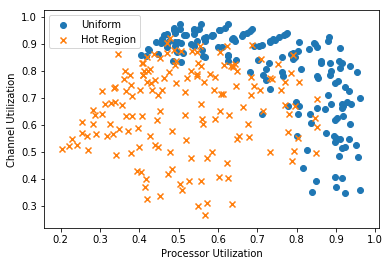

In [16]:
plt.scatter(X[0:160,0],X[0:160,1], marker='o', label='Uniform')
plt.scatter(X[160:320,0],X[160:320,1], marker='x', label='Hot Region')
plt.xlabel('Processor Utilization')
plt.ylabel('Channel Utilization')
plt.legend()

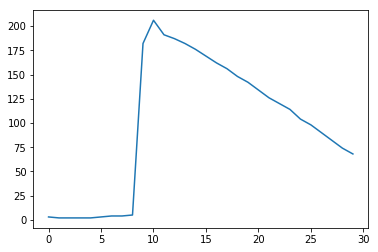

In [17]:
plt.plot(moj_perceptron.errors_)

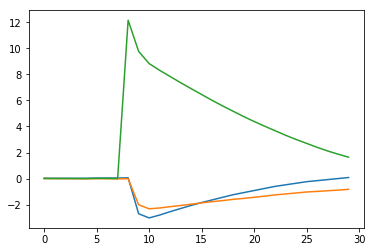

In [18]:
plt.plot(moj_perceptron.vahy_to_visualize_1)
plt.plot(moj_perceptron.vahy_to_visualize_2)
plt.plot(moj_perceptron.vahy_to_visualize_3)

In [19]:
X = df5.iloc[0:479, [1,2]].values
y = df5.iloc[0:479, 0].values

y = np.where(y == 'PS', -1, 1)
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [20]:
moj_perceptron_PS = Perceptron()
moj_perceptron_PS.fit(X,y)

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[  1.22043872 -10.83766506]
[  1.2329504  -10.82051922]
[  1.24415666 -10.80295116]
[  1.2547865  -10.78496782]
[  1.26431114 -10.76678032]
[  1.27279064 -10.74925254]
[  1.29108576 -10.73894212]
[  1.30938896 -10.72565878]
[  1.32748692 -10.71041294]
[  1.34471416 -10.69383238]
[  1.3605547  -10.67648168]
[  1.374661   -10.65864002]
[  1.38740326 -10.6402796 ]
[  1.39871144 -10.62186294]
[  1.40883134 -10.60378794]
[  1.41794268 -10.58575322]
[  1.43608228 -10.57607128]
[  1.45446722 -10.5634435 ]
[  1.4729283  -10.54861226]
[  1.49108634 -10.53191504]
[  1.50798758 -10.51387684]
[  1.52266068 -10.49573518]
[  1.53589972 -10.47717546]
[  1.54762946 -10.4585199 ]
[  1.55846522 -10.43960116]
[  1.5682734  -10.42069144]
[  1.58739036 -10.41110602]
[  1.60609148 -10.39907268]
[  1.62474538 -10.3845831 ]
[  1.6430501  -10.36801644]
[  1.66070638 -10.3495477 ]
[  1.67614512 -10.33080604]
[  1.68989124 -10.31169216]
[  1.70223138 -10.29250882]
[  1.71326146 -10.27339632]
[  1.7233333  -10.25

[ 2.40837716 -8.75072562]
[ 2.40837716 -8.75072562]
[ 2.40837716 -8.75072562]
[ 2.40837716 -8.75072562]
[ 2.40837716 -8.75072562]
[ 2.40837716 -8.75072562]
[ 2.40837716 -8.75072562]
[ 2.40837716 -8.75072562]
[ 2.40837716 -8.75072562]
[ 2.38907632 -8.76204924]
[ 2.36958392 -8.7761298 ]
[ 2.36958392 -8.7761298 ]
[ 2.36958392 -8.7761298 ]
[ 2.36958392 -8.7761298 ]
[ 2.36958392 -8.7761298 ]
[ 2.36958392 -8.7761298 ]
[ 2.36958392 -8.7761298 ]
[ 2.36958392 -8.7761298 ]
[ 2.36958392 -8.7761298 ]
[ 2.35002948 -8.78726106]
[ 2.33029916 -8.80071522]
[ 2.33029916 -8.80071522]
[ 2.33029916 -8.80071522]
[ 2.33029916 -8.80071522]
[ 2.33029916 -8.80071522]
[ 2.33029916 -8.80071522]
[ 2.33029916 -8.80071522]
[ 2.33029916 -8.80071522]
[ 2.33029916 -8.80071522]
[ 2.33029916 -8.80071522]
[ 2.33029916 -8.80071522]
[ 2.34476722 -8.7853742 ]
[ 2.35919142 -8.76921796]
[ 2.37213212 -8.75238254]
[ 2.38348016 -8.73537594]
[ 2.3937127  -8.71806344]
[ 2.4031239  -8.70028688]
[ 2.41156144 -8.68263584]
[ 2.41156144

[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.13141048 -7.57188572]
[ 3.11285276 -7.5812687 ]
[ 3.09455928

[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3176506]
[ 2.7746964 -7.3

[ 2.0182465  -7.74814014]
[ 2.0182465  -7.74814014]
[ 2.0364696  -7.73046086]
[ 2.0364696  -7.73046086]
[ 2.0364696  -7.73046086]
[ 2.04899382 -7.71100668]
[ 2.0601403  -7.69156606]
[ 2.07022922 -7.67209558]
[ 2.07022922 -7.67209558]
[ 2.07022922 -7.67209558]
[ 2.07022922 -7.67209558]
[ 2.07022922 -7.67209558]
[ 2.07022922 -7.67209558]
[ 2.0827253  -7.65534142]
[ 2.09394306 -7.6382449 ]
[ 2.10363792 -7.62150462]
[ 2.1126054 -7.6042218]
[ 2.12070524 -7.58706034]
[ 2.12070524 -7.58706034]
[ 2.12070524 -7.58706034]
[ 2.12070524 -7.58706034]
[ 2.12070524 -7.58706034]
[ 2.12070524 -7.58706034]
[ 2.13492326 -7.56916658]
[ 2.14714652 -7.55138828]
[ 2.1579412  -7.53357438]
[ 2.1677629  -7.51546188]
[ 2.17662368 -7.49734208]
[ 2.17662368 -7.49734208]
[ 2.17662368 -7.49734208]
[ 2.17662368 -7.49734208]
[ 2.17662368 -7.49734208]
[ 2.17662368 -7.49734208]
[ 2.19152046 -7.47904312]
[ 2.20478414 -7.46034606]
[ 2.21648108 -7.44167662]
[ 2.226875   -7.42301256]
[ 2.2362858  -7.40428512]
[ 2.2362858  -

[ 2.0453583  -7.39714428]
[ 2.031893  -7.4132198]
[ 2.01988096 -7.42977918]
[ 2.01988096 -7.42977918]
[ 2.01988096 -7.42977918]
[ 2.01988096 -7.42977918]
[ 2.01988096 -7.42977918]
[ 2.00233738 -7.43821216]
[ 1.98530072 -7.44888508]
[ 1.96775318 -7.46261216]
[ 1.95104184 -7.47821424]
[ 1.93541258 -7.4952889 ]
[ 1.93541258 -7.4952889 ]
[ 1.93541258 -7.4952889 ]
[ 1.93541258 -7.4952889 ]
[ 1.93541258 -7.4952889 ]
[ 1.93541258 -7.4952889 ]
[ 1.91711042 -7.50314446]
[ 1.89873796 -7.51420766]
[ 1.88076926 -7.5277785 ]
[ 1.86272746 -7.54410212]
[ 1.86272746 -7.54410212]
[ 1.86272746 -7.54410212]
[ 1.86272746 -7.54410212]
[ 1.86272746 -7.54410212]
[ 1.86272746 -7.54410212]
[ 1.86272746 -7.54410212]
[ 1.84411778 -7.55199258]
[ 1.8252738  -7.56300682]
[ 1.80644156 -7.5769115 ]
[ 1.78789464 -7.59335734]
[ 1.78789464 -7.59335734]
[ 1.78789464 -7.59335734]
[ 1.78789464 -7.59335734]
[ 1.78789464 -7.59335734]
[ 1.78789464 -7.59335734]
[ 1.78789464 -7.59335734]
[ 1.77054804 -7.60629414]
[ 1.753745   -

[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.08396504 -6.84068038]
[ 2.06540732 -6.85006336]
[ 2.04711384 -6.86196024]
[ 2.02916118 -6.87622794]
[ 2.01180204 -6.89237794]
[ 1.99573764 -6.90976076]
[ 1.9814375 

[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196 -6.6164882 ]
[ 1.75442196

[ 1.37953132 -6.48639426]
[ 1.37953132 -6.48639426]
[ 1.37953132 -6.48639426]
[ 1.37953132 -6.48639426]
[ 1.37953132 -6.48639426]
[ 1.37953132 -6.48639426]
[ 1.37953132 -6.48639426]
[ 1.37953132 -6.48639426]
[ 1.37953132 -6.48639426]
[ 1.39036708 -6.46747552]
[ 1.40017526 -6.4485658 ]
[ 1.40017526 -6.4485658 ]
[ 1.40017526 -6.4485658 ]
[ 1.40017526 -6.4485658 ]
[ 1.40017526 -6.4485658 ]
[ 1.40017526 -6.4485658 ]
[ 1.40017526 -6.4485658 ]
[ 1.40017526 -6.4485658 ]
[ 1.4125154  -6.42938246]
[ 1.42354548 -6.41026996]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732 -6.39117968]
[ 1.43361732

[ 0.78678798 -6.72486246]
[ 0.79755114 -6.70574684]
[ 0.80731608 -6.68654372]
[ 0.80731608 -6.68654372]
[ 0.80731608 -6.68654372]
[ 0.80731608 -6.68654372]
[ 0.80731608 -6.68654372]
[ 0.82553918 -6.66886444]
[ 0.82553918 -6.66886444]
[ 0.82553918 -6.66886444]
[ 0.8380634  -6.64941026]
[ 0.84920988 -6.62996964]
[ 0.8592988  -6.61049916]
[ 0.8592988  -6.61049916]
[ 0.8592988  -6.61049916]
[ 0.8592988  -6.61049916]
[ 0.8592988  -6.61049916]
[ 0.8592988  -6.61049916]
[ 0.87179488 -6.593745  ]
[ 0.88301264 -6.57664848]
[ 0.8927075 -6.5599082]
[ 0.90167498 -6.54262538]
[ 0.90977482 -6.52546392]
[ 0.90977482 -6.52546392]
[ 0.90977482 -6.52546392]
[ 0.90977482 -6.52546392]
[ 0.90977482 -6.52546392]
[ 0.90977482 -6.52546392]
[ 0.92399284 -6.50757016]
[ 0.9362161  -6.48979186]
[ 0.94701078 -6.47197796]
[ 0.95683248 -6.45386546]
[ 0.96569326 -6.43574566]
[ 0.96569326 -6.43574566]
[ 0.96569326 -6.43574566]
[ 0.96569326 -6.43574566]
[ 0.96569326 -6.43574566]
[ 0.96569326 -6.43574566]
[ 0.98059004 -

[ 0.70899034 -6.50667272]
[ 0.70899034 -6.50667272]
[ 0.70899034 -6.50667272]
[ 0.70899034 -6.50667272]
[ 0.70899034 -6.50667272]
[ 0.69068818 -6.51452828]
[ 0.67231572 -6.52559148]
[ 0.65434702 -6.53916232]
[ 0.63630522 -6.55548594]
[ 0.63630522 -6.55548594]
[ 0.63630522 -6.55548594]
[ 0.63630522 -6.55548594]
[ 0.63630522 -6.55548594]
[ 0.63630522 -6.55548594]
[ 0.63630522 -6.55548594]
[ 0.61769554 -6.5633764 ]
[ 0.59885156 -6.57439064]
[ 0.58001932 -6.58829532]
[ 0.58001932 -6.58829532]
[ 0.58001932 -6.58829532]
[ 0.58001932 -6.58829532]
[ 0.58001932 -6.58829532]
[ 0.58001932 -6.58829532]
[ 0.58001932 -6.58829532]
[ 0.58001932 -6.58829532]
[ 0.56267272 -6.60123212]
[ 0.54586968 -6.6152835 ]
[ 0.5293714  -6.63066058]
[ 0.5293714  -6.63066058]
[ 0.5293714  -6.63066058]
[ 0.5293714  -6.63066058]
[ 0.5293714  -6.63066058]
[ 0.5293714  -6.63066058]
[ 0.5293714  -6.63066058]
[ 0.5293714  -6.63066058]
[ 0.51064194 -6.64242724]
[ 0.49262666 -6.65568558]
[ 0.49262666 -6.65568558]
[ 0.49262666

[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482 -5.96121072]
[ 0.84119482

[ 0.5654273  -5.77629888]
[ 0.5654273  -5.77629888]
[ 0.5654273  -5.77629888]
[ 0.5654273  -5.77629888]
[ 0.5654273  -5.77629888]
[ 0.5654273  -5.77629888]
[ 0.5654273  -5.77629888]
[ 0.5654273  -5.77629888]
[ 0.5654273  -5.77629888]
[ 0.5654273  -5.77629888]
[ 0.5654273  -5.77629888]
[ 0.5654273  -5.77629888]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914 -5.7572086 ]
[ 0.57549914

[-0.1810602  -6.29940114]
[-0.1810602  -6.29940114]
[-0.1810602  -6.29940114]
[-0.1810602  -6.29940114]
[-0.1810602  -6.29940114]
[-0.1810602  -6.29940114]
[-0.1810602  -6.29940114]
[-0.1810602  -6.29940114]
[-0.1810602  -6.29940114]
[-0.16659214 -6.28406012]
[-0.15216794 -6.26790388]
[-0.13922724 -6.25106846]
[-0.1278792  -6.23406186]
[-0.11764666 -6.21674936]
[-0.10823546 -6.1989728 ]
[-0.09979792 -6.18132176]
[-0.09979792 -6.18132176]
[-0.09979792 -6.18132176]
[-0.09979792 -6.18132176]
[-0.082721  -6.1658662]
[-0.06679244 -6.14881498]
[-0.05215686 -6.1306004 ]
[-0.03935264 -6.11227522]
[-0.02797418 -6.09378356]
[-0.01769326 -6.07515388]
[-0.00843036 -6.05653236]
[-0.00843036 -6.05653236]
[-0.00843036 -6.05653236]
[-0.00843036 -6.05653236]
[ 0.00980186 -6.0403518 ]
[ 0.02681738 -6.02257228]
[ 0.0421957  -6.00389624]
[ 0.05566132 -5.9850801 ]
[ 0.06769322 -5.96604676]
[ 0.07845638 -5.94693114]
[ 0.08822132 -5.92772802]
[ 0.08822132 -5.92772802]
[ 0.08822132 -5.92772802]
[ 0.08822132 -

[-0.37303152 -6.06574954]
[-0.37303152 -6.06574954]
[-0.37303152 -6.06574954]
[-0.37303152 -6.06574954]
[-0.37303152 -6.06574954]
[-0.37303152 -6.06574954]
[-0.37303152 -6.06574954]
[-0.37303152 -6.06574954]
[-0.37303152 -6.06574954]
[-0.37303152 -6.06574954]
[-0.37303152 -6.06574954]
[-0.37303152 -6.06574954]
[-0.39233236 -6.07707316]
[-0.39233236 -6.07707316]
[-0.39233236 -6.07707316]
[-0.39233236 -6.07707316]
[-0.39233236 -6.07707316]
[-0.39233236 -6.07707316]
[-0.39233236 -6.07707316]
[-0.39233236 -6.07707316]
[-0.39233236 -6.07707316]
[-0.39233236 -6.07707316]
[-0.4118868  -6.08820442]
[-0.4118868  -6.08820442]
[-0.4118868  -6.08820442]
[-0.4118868  -6.08820442]
[-0.4118868  -6.08820442]
[-0.4118868  -6.08820442]
[-0.4118868  -6.08820442]
[-0.4118868  -6.08820442]
[-0.4118868  -6.08820442]
[-0.4118868  -6.08820442]
[-0.4118868  -6.08820442]
[-0.4118868  -6.08820442]
[-0.39741874 -6.0728634 ]
[-0.38299454 -6.05670716]
[-0.37005384 -6.03987174]
[-0.3587058  -6.02286514]
[-0.34847326

[ 0.0812795  -5.38565542]
[ 0.0812795  -5.38565542]
[ 0.0812795  -5.38565542]
[ 0.0812795  -5.38565542]
[ 0.0812795  -5.38565542]
[ 0.0812795  -5.38565542]
[ 0.0812795  -5.38565542]
[ 0.0812795  -5.38565542]
[ 0.0812795  -5.38565542]
[ 0.0812795  -5.38565542]
[ 0.06272178 -5.3950384 ]
[ 0.0444283  -5.40693528]
[ 0.02647564 -5.42120298]
[ 0.0091165  -5.43735298]
[-0.0069479 -5.4547358]
[-0.02124804 -5.47275872]
[-0.02124804 -5.47275872]
[-0.02124804 -5.47275872]
[-0.02124804 -5.47275872]
[-0.02124804 -5.47275872]
[-0.04019264 -5.48091028]
[-0.05891814 -5.49207174]
[-0.07769606 -5.5061082 ]
[-0.09602182 -5.5225214 ]
[-0.09602182 -5.5225214 ]
[-0.09602182 -5.5225214 ]
[-0.09602182 -5.5225214 ]
[-0.09602182 -5.5225214 ]
[-0.09602182 -5.5225214 ]
[-0.09602182 -5.5225214 ]
[-0.11515268 -5.53024032]
[-0.13444862 -5.5412313 ]
[-0.1536246 -5.5552464]
[-0.1536246 -5.5552464]
[-0.1536246 -5.5552464]
[-0.1536246 -5.5552464]
[-0.1536246 -5.5552464]
[-0.1536246 -5.5552464]
[-0.1536246 -5.5552464]
[-

[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498  -5.19637156]
[-0.1273498 

[-0.5060537  -5.27026222]
[-0.49352948 -5.25080804]
[-0.482383   -5.23136742]
[-0.47229408 -5.21189694]
[-0.47229408 -5.21189694]
[-0.47229408 -5.21189694]
[-0.47229408 -5.21189694]
[-0.47229408 -5.21189694]
[-0.47229408 -5.21189694]
[-0.47229408 -5.21189694]
[-0.47229408 -5.21189694]
[-0.47229408 -5.21189694]
[-0.47229408 -5.21189694]
[-0.47229408 -5.21189694]
[-0.47229408 -5.21189694]
[-0.47229408 -5.21189694]
[-0.47229408 -5.21189694]
[-0.47229408 -5.21189694]
[-0.45657356 -5.19463218]
[-0.44235554 -5.17673842]
[-0.44235554 -5.17673842]
[-0.44235554 -5.17673842]
[-0.43253384 -5.15862592]
[-0.43253384 -5.15862592]
[-0.43253384 -5.15862592]
[-0.43253384 -5.15862592]
[-0.43253384 -5.15862592]
[-0.43253384 -5.15862592]
[-0.41587604 -5.14098356]
[-0.40097926 -5.1226846 ]
[-0.38771558 -5.10398754]
[-0.37601864 -5.0853181 ]
[-0.37601864 -5.0853181 ]
[-0.37601864 -5.0853181 ]
[-0.37601864 -5.0853181 ]
[-0.37601864 -5.0853181 ]
[-0.37601864 -5.0853181 ]
[-0.37601864 -5.0853181 ]
[-0.37601864

[-0.79074318 -5.22218962]
[-0.77372766 -5.2044101 ]
[-0.75834934 -5.18573406]
[-0.74488372 -5.16691792]
[-0.73285182 -5.14788458]
[-0.72208866 -5.12876896]
[-0.71232372 -5.10956584]
[-0.71232372 -5.10956584]
[-0.71232372 -5.10956584]
[-0.71232372 -5.10956584]
[-0.69362428 -5.09322486]
[-0.67540118 -5.07554558]
[-0.67540118 -5.07554558]
[-0.67540118 -5.07554558]
[-0.66287696 -5.0560914 ]
[-0.65173048 -5.03665078]
[-0.64164156 -5.0171803 ]
[-0.64164156 -5.0171803 ]
[-0.64164156 -5.0171803 ]
[-0.64164156 -5.0171803 ]
[-0.64164156 -5.0171803 ]
[-0.64164156 -5.0171803 ]
[-0.64164156 -5.0171803 ]
[-0.64164156 -5.0171803 ]
[-0.64164156 -5.0171803 ]
[-0.64164156 -5.0171803 ]
[-0.64164156 -5.0171803 ]
[-0.64164156 -5.0171803 ]
[-0.64164156 -5.0171803 ]
[-0.64164156 -5.0171803 ]
[-0.64164156 -5.0171803 ]
[-0.62592104 -4.99991554]
[-0.61170302 -4.98202178]
[-0.61170302 -4.98202178]
[-0.61170302 -4.98202178]
[-0.61170302 -4.98202178]
[-0.61170302 -4.98202178]
[-0.61170302 -4.98202178]
[-0.61170302

[-0.97987138 -5.09360092]
[-0.96849292 -5.07510926]
[-0.958212   -5.05647958]
[-0.9489491  -5.03785806]
[-0.9489491  -5.03785806]
[-0.9489491  -5.03785806]
[-0.9489491  -5.03785806]
[-0.93071688 -5.0216775 ]
[-0.91370136 -5.00389798]
[-0.89832304 -4.98522194]
[-0.88485742 -4.9664058 ]
[-0.87282552 -4.94737246]
[-0.86206236 -4.92825684]
[-0.85229742 -4.90905372]
[-0.85229742 -4.90905372]
[-0.85229742 -4.90905372]
[-0.85229742 -4.90905372]
[-0.83359798 -4.89271274]
[-0.81537488 -4.87503346]
[-0.81537488 -4.87503346]
[-0.81537488 -4.87503346]
[-0.80285066 -4.85557928]
[-0.79170418 -4.83613866]
[-0.78161526 -4.81666818]
[-0.78161526 -4.81666818]
[-0.78161526 -4.81666818]
[-0.78161526 -4.81666818]
[-0.78161526 -4.81666818]
[-0.78161526 -4.81666818]
[-0.78161526 -4.81666818]
[-0.78161526 -4.81666818]
[-0.78161526 -4.81666818]
[-0.78161526 -4.81666818]
[-0.78161526 -4.81666818]
[-0.78161526 -4.81666818]
[-0.78161526 -4.81666818]
[-0.78161526 -4.81666818]
[-0.78161526 -4.81666818]
[-0.78161526

[-1.24236666 -5.09422166]
[-1.2616675  -5.10554528]
[-1.2616675  -5.10554528]
[-1.2616675  -5.10554528]
[-1.2616675  -5.10554528]
[-1.2616675  -5.10554528]
[-1.2616675  -5.10554528]
[-1.2616675  -5.10554528]
[-1.2616675  -5.10554528]
[-1.2616675  -5.10554528]
[-1.2616675  -5.10554528]
[-1.28122194 -5.11667654]
[-1.28122194 -5.11667654]
[-1.28122194 -5.11667654]
[-1.28122194 -5.11667654]
[-1.28122194 -5.11667654]
[-1.28122194 -5.11667654]
[-1.28122194 -5.11667654]
[-1.28122194 -5.11667654]
[-1.28122194 -5.11667654]
[-1.28122194 -5.11667654]
[-1.28122194 -5.11667654]
[-1.26516984 -5.10390622]
[-1.25070178 -5.0885652 ]
[-1.23627758 -5.07240896]
[-1.22333688 -5.05557354]
[-1.21198884 -5.03856694]
[-1.2017563  -5.02125444]
[-1.1923451  -5.00347788]
[-1.18390756 -4.98582684]
[-1.18390756 -4.98582684]
[-1.18390756 -4.98582684]
[-1.18390756 -4.98582684]
[-1.16683064 -4.97037128]
[-1.15090208 -4.95332006]
[-1.1362665  -4.93510548]
[-1.12346228 -4.9167803 ]
[-1.11208382 -4.89828864]
[-1.1018029 

[-1.41547662 -4.94760468]
[-1.41547662 -4.94760468]
[-1.41547662 -4.94760468]
[-1.41547662 -4.94760468]
[-1.41547662 -4.94760468]
[-1.41547662 -4.94760468]
[-1.41547662 -4.94760468]
[-1.39942452 -4.93483436]
[-1.38495646 -4.91949334]
[-1.37053226 -4.9033371 ]
[-1.35759156 -4.88650168]
[-1.34624352 -4.86949508]
[-1.33601098 -4.85218258]
[-1.32659978 -4.83440602]
[-1.31816224 -4.81675498]
[-1.31816224 -4.81675498]
[-1.31816224 -4.81675498]
[-1.31816224 -4.81675498]
[-1.30108532 -4.80129942]
[-1.28515676 -4.7842482 ]
[-1.27052118 -4.76603362]
[-1.25771696 -4.74770844]
[-1.2463385  -4.72921678]
[-1.23605758 -4.7105871 ]
[-1.22679468 -4.69196558]
[-1.22679468 -4.69196558]
[-1.22679468 -4.69196558]
[-1.22679468 -4.69196558]
[-1.20856246 -4.67578502]
[-1.19154694 -4.6580055 ]
[-1.17616862 -4.63932946]
[-1.162703   -4.62051332]
[-1.1506711  -4.60147998]
[-1.13990794 -4.58236436]
[-1.130143   -4.56316124]
[-1.130143   -4.56316124]
[-1.130143   -4.56316124]
[-1.130143   -4.56316124]
[-1.11144356

[-1.4761938  -4.75743872]
[-1.4761938  -4.75743872]
[-1.4761938  -4.75743872]
[-1.49568984 -4.76682552]
[-1.49568984 -4.76682552]
[-1.49568984 -4.76682552]
[-1.49568984 -4.76682552]
[-1.49568984 -4.76682552]
[-1.49568984 -4.76682552]
[-1.49568984 -4.76682552]
[-1.49568984 -4.76682552]
[-1.49568984 -4.76682552]
[-1.49568984 -4.76682552]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.51143254 -4.77900538]
[-1.53073338 -4.790329  ]
[-1.53073338 -4.790329  ]
[-1.53073338 -4.790329  ]
[-1.53073338 -4.790329  ]
[-1.53073338 -4.790329  ]
[-1.53073338

[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494 -4.21456566]
[-1.09868494

[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448 -4.05608072]
[-1.21329448

[-1.4688131 -4.0915984]
[-1.4688131 -4.0915984]
[-1.4688131 -4.0915984]
[-1.45011366 -4.07525742]
[-1.43189056 -4.05757814]
[-1.43189056 -4.05757814]
[-1.43189056 -4.05757814]
[-1.41936634 -4.03812396]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.40821986 -4.01868334]
[-1.39156206 -4.00104098]
[-1.39156206 -4.00104098]
[-1.39156206 -4.00104098]
[-1.39156206 -4.00104098]
[-1.39156206 -4.00

[-1.64779652 -4.0850025 ]
[-1.64779652 -4.0850025 ]
[-1.64779652 -4.0850025 ]
[-1.64779652 -4.0850025 ]
[-1.6295643  -4.06882194]
[-1.61254878 -4.05104242]
[-1.59717046 -4.03236638]
[-1.58370484 -4.01355024]
[-1.57167294 -3.9945169 ]
[-1.56090978 -3.97540128]
[-1.56090978 -3.97540128]
[-1.56090978 -3.97540128]
[-1.56090978 -3.97540128]
[-1.56090978 -3.97540128]
[-1.54221034 -3.9590603 ]
[-1.52398724 -3.94138102]
[-1.52398724 -3.94138102]
[-1.52398724 -3.94138102]
[-1.51146302 -3.92192684]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654 -3.90248622]
[-1.50031654

[-1.7988918 -4.1564608]
[-1.7988918 -4.1564608]
[-1.7988918 -4.1564608]
[-1.7988918 -4.1564608]
[-1.7988918 -4.1564608]
[-1.7988918 -4.1564608]
[-1.7988918 -4.1564608]
[-1.7988918 -4.1564608]
[-1.7988918 -4.1564608]
[-1.81719396 -4.16431636]
[-1.83556642 -4.17537956]
[-1.83556642 -4.17537956]
[-1.83556642 -4.17537956]
[-1.83556642 -4.17537956]
[-1.83556642 -4.17537956]
[-1.83556642 -4.17537956]
[-1.83556642 -4.17537956]
[-1.83556642 -4.17537956]
[-1.83556642 -4.17537956]
[-1.8541761  -4.18327002]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.87302008 -4.19428426]
[-1.

[-1.61656862 -3.80830258]
[-1.6277928 -3.8267387]
[-1.63786222 -3.84521526]
[-1.64706948 -3.86388192]
[-1.66601408 -3.87203348]
[-1.68473958 -3.88319494]
[-1.7035175 -3.8972314]
[-1.7035175 -3.8972314]
[-1.7035175 -3.8972314]
[-1.7035175 -3.8972314]
[-1.7035175 -3.8972314]
[-1.7035175 -3.8972314]
[-1.7035175 -3.8972314]
[-1.7035175 -3.8972314]
[-1.72264836 -3.90495032]
[-1.7419443 -3.9159413]
[-1.76112028 -3.9299564 ]
[-1.76112028 -3.9299564 ]
[-1.76112028 -3.9299564 ]
[-1.76112028 -3.9299564 ]
[-1.76112028 -3.9299564 ]
[-1.76112028 -3.9299564 ]
[-1.76112028 -3.9299564 ]
[-1.76112028 -3.9299564 ]
[-1.77687434 -3.93885518]
[-1.79230974 -3.9496958 ]
[-1.80740114 -3.96305204]
[-1.82181108 -3.97770066]
[-1.82181108 -3.97770066]
[-1.82181108 -3.97770066]
[-1.8322468  -3.99418712]
[-1.84178174 -4.01128434]
[-1.85041488 -4.02848278]
[-1.8583602  -4.04592896]
[-1.87590378 -4.05436194]
[-1.89294044 -4.06503486]
[-1.89294044 -4.06503486]
[-1.89294044 -4.06503486]
[-1.89294044 -4.06503486]
[-1.89

[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908  -3.59918688]
[-1.5795908 

[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098 -3.50355956]
[-1.64592098

[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.7205445  -3.42741104]
[-1.70288822 -3.4089423 ]
[-1.70288822 -3.4089423 ]
[-1.70288822 -3.4089423 ]
[-1.70288822 -3.4089423 ]
[-1.70288822 -3.4089423 ]
[-1.70288822 -3.4089423 ]
[-1.70288822 -3.4089423 ]
[-1.70288822 -3.4089423 ]
[-1.70288822 -3.4089423 ]
[-1.70288822 -3.4089423 ]
[-1.70288822 -3.4089423 ]
[-1.70288822 -3.4089423 ]
[-1.70288822 -3.4089423 ]
[-1.70288822 -3.4089423 ]
[-1.70288822 -3.4089423 ]
[-1.70288822 -3.4089423 ]
[-1.70288822

[-2.13065212 -3.7839786 ]
[-2.14967812 -3.7939529 ]
[-2.14967812 -3.7939529 ]
[-2.14967812 -3.7939529 ]
[-2.14967812 -3.7939529 ]
[-2.14967812 -3.7939529 ]
[-2.14967812 -3.7939529 ]
[-2.14967812 -3.7939529 ]
[-2.14967812 -3.7939529 ]
[-2.14967812 -3.7939529 ]
[-2.14967812 -3.7939529 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416 -3.8033397 ]
[-2.16917416

[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503  -3.31979622]
[-1.7525503 

[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922 -3.23644338]
[-1.79615922

[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814 -3.15309054]
[-1.83976814

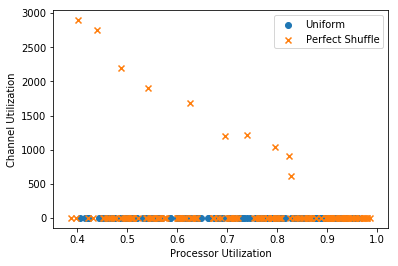

In [21]:
plt.scatter(X[0:160,0],X[0:160,1], marker='o', label='Uniform')
plt.scatter(X[320:479,0],X[320:479,1], marker='x', label='Perfect Shuffle')

plt.xlabel('Processor Utilization')
plt.ylabel('Channel Utilization')
plt.legend()

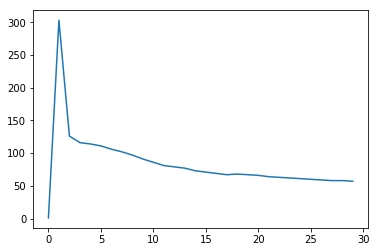

In [22]:
plt.plot(moj_perceptron_PS.errors_)

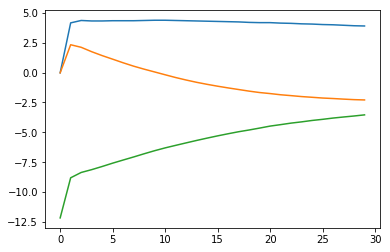

In [23]:
plt.plot(moj_perceptron_PS.vahy_to_visualize_1)
plt.plot(moj_perceptron_PS.vahy_to_visualize_2)
plt.plot(moj_perceptron_PS.vahy_to_visualize_3)

In [24]:
X = df5.iloc[0:479, [1,2]].values
y = df5.iloc[0:479, 0].values

y = np.where(y == 'HR', -1, 1)
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1

In [25]:
moj_perceptron_HR = Perceptron()
moj_perceptron_HR.fit(X,y)

[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]


[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130000e-03 1.21514386e+01]
[5.58130

[-0.64310876 11.32143816]
[-0.65279598 11.30989232]
[-0.6613214 11.2987378]
[-0.66944674 11.28611592]
[-0.67675178 11.27347824]
[-0.6835148  11.25981712]
[-0.6896239  11.24700462]
[-0.69535818 11.23427546]
[-0.70781372 11.22509768]
[-0.72209836 11.21203658]
[-0.73335952 11.19999282]
[-0.74564112 11.18574282]
[-0.75741772 11.1711699 ]
[-0.76804756 11.15521156]
[-0.77755428 11.13931086]
[-0.78581636 11.1233442 ]
[-0.7930554  11.10792544]
[-0.79977462 11.09322406]
[-0.81565396 11.08315462]
[-0.8312418  11.07164768]
[-0.84666926 11.0564831 ]
[-0.861428   11.04105254]
[-0.87441864 11.02504212]
[-0.88602796 11.00930462]
[-0.89695286 10.9919456 ]
[-0.90682448 10.97522894]
[-0.9153708 10.9590977]
[-0.92351148 10.94248658]
[-0.93928436 10.93316158]
[-0.95622636 10.92064074]
[-0.9721587  10.90724908]
[-0.9879014  10.89140186]
[-1.00295302 10.8748706 ]
[-1.01667766 10.85695394]
[-1.0278104  10.84057686]
[-1.0384793  10.82313242]
[-1.04788282 10.80577616]
[-1.05661196 10.78851922]
[-1.07359944 10.

[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735  10.14322708]
[-1.4069735 

[-1.5714702   9.06731564]
[-1.5714702   9.06731564]
[-1.5714702   9.06731564]
[-1.55353414  9.07549116]
[-1.53553994  9.08654984]
[-1.53553994  9.08654984]
[-1.53553994  9.08654984]
[-1.53553994  9.08654984]
[-1.53553994  9.08654984]
[-1.53553994  9.08654984]
[-1.53553994  9.08654984]
[-1.53553994  9.08654984]
[-1.53553994  9.08654984]
[-1.51725288  9.0945974 ]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.499052   9.1055276]
[-1.48075688  9.11583802]
[-1.48075688  9.11583802]
[-1.48075688  9.11583802]
[-1.48075688  9.11583802]
[-1.48075688  9.11583802]
[-1.48075688  9.11583802]
[-1.48075688  9.11583802

[-1.72483682  8.30229832]
[-1.70599284  8.31331256]
[-1.6871606   8.32721724]
[-1.6871606   8.32721724]
[-1.6871606   8.32721724]
[-1.6871606   8.32721724]
[-1.6871606   8.32721724]
[-1.6871606   8.32721724]
[-1.6871606   8.32721724]
[-1.6871606   8.32721724]
[-1.669814    8.34015404]
[-1.65301096  8.35420542]
[-1.65301096  8.35420542]
[-1.65301096  8.35420542]
[-1.65301096  8.35420542]
[-1.65301096  8.35420542]
[-1.65301096  8.35420542]
[-1.65301096  8.35420542]
[-1.65301096  8.35420542]
[-1.65301096  8.35420542]
[-1.6342815   8.36597208]
[-1.61626622  8.37923042]
[-1.59812182  8.39455542]
[-1.59812182  8.39455542]
[-1.59812182  8.39455542]
[-1.59812182  8.39455542]
[-1.59812182  8.39455542]
[-1.59812182  8.39455542]
[-1.59812182  8.39455542]
[-1.59812182  8.39455542]
[-1.57909582  8.40452972]
[-1.56035966  8.41731306]
[-1.54173558  8.43172764]
[-1.54173558  8.43172764]
[-1.54173558  8.43172764]
[-1.54173558  8.43172764]
[-1.54173558  8.43172764]
[-1.54173558  8.43172764]
[-1.54173558

[-1.50209364  7.96108876]
[-1.50209364  7.96108876]
[-1.50209364  7.96108876]
[-1.50209364  7.96108876]
[-1.50209364  7.96108876]
[-1.51793284  7.94389432]
[-1.53069772  7.92757766]
[-1.54315242  7.9097228 ]
[-1.55422774  7.89191168]
[-1.56401258  7.87433668]
[-1.57356926  7.85589918]
[-1.57356926  7.85589918]
[-1.57356926  7.85589918]
[-1.57356926  7.85589918]
[-1.57356926  7.85589918]
[-1.57356926  7.85589918]
[-1.57356926  7.85589918]
[-1.57356926  7.85589918]
[-1.57356926  7.85589918]
[-1.57356926  7.85589918]
[-1.57356926  7.85589918]
[-1.57356926  7.85589918]
[-1.57356926  7.85589918]
[-1.57356926  7.85589918]
[-1.57356926  7.85589918]
[-1.58642386  7.8393714 ]
[-1.58642386  7.8393714 ]
[-1.58642386  7.8393714 ]
[-1.58642386  7.8393714 ]
[-1.59487514  7.82339016]
[-1.60181992  7.80612628]
[-1.60181992  7.80612628]
[-1.60181992  7.80612628]
[-1.60181992  7.80612628]
[-1.60181992  7.80612628]
[-1.60181992  7.80612628]
[-1.6139101   7.78874712]
[-1.62401586  7.77124712]
[-1.62401586

[-1.18533738  7.42012964]
[-1.18533738  7.42012964]
[-1.18533738  7.42012964]
[-1.18533738  7.42012964]
[-1.18533738  7.42012964]
[-1.18533738  7.42012964]
[-1.18533738  7.42012964]
[-1.18533738  7.42012964]
[-1.16677966  7.42951262]
[-1.14848618  7.4414095 ]
[-1.13053352  7.4556772 ]
[-1.11317438  7.4718272 ]
[-1.11317438  7.4718272 ]
[-1.11317438  7.4718272 ]
[-1.11317438  7.4718272 ]
[-1.11317438  7.4718272 ]
[-1.11317438  7.4718272 ]
[-1.11317438  7.4718272 ]
[-1.09422978  7.47997876]
[-1.07550428  7.49114022]
[-1.05672636  7.50517668]
[-1.0384006   7.52158988]
[-1.0384006   7.52158988]
[-1.0384006   7.52158988]
[-1.0384006   7.52158988]
[-1.0384006   7.52158988]
[-1.0384006   7.52158988]
[-1.0384006   7.52158988]
[-1.01926974  7.5293088 ]
[-0.9999738   7.54029978]
[-0.98079782  7.55431488]
[-0.98079782  7.55431488]
[-0.98079782  7.55431488]
[-0.98079782  7.55431488]
[-0.98079782  7.55431488]
[-0.98079782  7.55431488]
[-0.98079782  7.55431488]
[-0.98079782  7.55431488]
[-0.96504376

[-0.36761438  7.69578416]
[-0.36761438  7.69578416]
[-0.36761438  7.69578416]
[-0.36761438  7.69578416]
[-0.3743774   7.68212304]
[-0.3743774   7.68212304]
[-0.3743774   7.68212304]
[-0.3743774   7.68212304]
[-0.3743774   7.68212304]
[-0.3743774   7.68212304]
[-0.386659    7.66787304]
[-0.3984356   7.65330012]
[-0.40906544  7.63734178]
[-0.41857216  7.62144108]
[-0.42683424  7.60547442]
[-0.43407328  7.59005566]
[-0.4407925   7.57535428]
[-0.4407925   7.57535428]
[-0.4407925   7.57535428]
[-0.45621996  7.5601897 ]
[-0.4709787   7.54475914]
[-0.48396934  7.52874872]
[-0.49557866  7.51301122]
[-0.50650356  7.4956522 ]
[-0.51637518  7.47893554]
[-0.5249215  7.4628043]
[-0.53306218  7.44619318]
[-0.53306218  7.44619318]
[-0.53306218  7.44619318]
[-0.53306218  7.44619318]
[-0.54880488  7.43034596]
[-0.5638565  7.4138147]
[-0.57758114  7.39589804]
[-0.58871388  7.37952096]
[-0.59938278  7.36207652]
[-0.6087863   7.34472026]
[-0.61751544  7.32746332]
[-0.61751544  7.32746332]
[-0.61751544  7.

[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.02019604 7.37383732]
[0.00791444 7.35958732]
[-3.8621600e-03  7.3450144e+00]
[-0.014492    7.32905606]
[-0.02399872  7.31315536]
[-0.0322608  7.2971887]
[-0.

[0.63393738 7.4359278 ]
[0.63393738 7.4359278 ]
[0.63393738 7.4359278 ]
[0.63393738 7.4359278 ]
[0.63393738 7.4359278 ]
[0.63393738 7.4359278 ]
[0.63393738 7.4359278 ]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44551322]
[0.65305434 7.44

[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.01192168 7.12995422]
[1.00161486 7.11

[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81093462]
[1.33748532 6.81

[1.57864192 6.48842686]
[1.57864192 6.48842686]
[1.57864192 6.48842686]
[1.57864192 6.48842686]
[1.57864192 6.48842686]
[1.57864192 6.48842686]
[1.57864192 6.48842686]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.59692898 6.49647442]
[1.6152241  6.50678484]
[1.6152241  6.50678484]
[1.6152241  6.50678484]
[1.6152241  6.50678484]
[1.6152241  6.50678484]
[1.6152241  6.50678484]
[1.6152241  6.50678484]
[1.6152241  6.50678484]
[1.6152241  6.50678484]
[1.6152241  6.50678484]
[1.6333637  6.51646678]
[1.6333637  6.51646678]
[1.6333637  6.51646678]
[1.6333637  6.51646678]
[1.6333637  6.51

[1.63818398 6.08688746]
[1.63818398 6.08688746]
[1.63818398 6.08688746]
[1.63818398 6.08688746]
[1.63818398 6.08688746]
[1.63818398 6.08688746]
[1.65773842 6.09801872]
[1.65773842 6.09801872]
[1.65773842 6.09801872]
[1.65773842 6.09801872]
[1.65773842 6.09801872]
[1.65773842 6.09801872]
[1.65773842 6.09801872]
[1.65773842 6.09801872]
[1.65773842 6.09801872]
[1.67452934 6.10506734]
[1.69107758 6.11519338]
[1.69107758 6.11519338]
[1.69107758 6.11519338]
[1.69107758 6.11519338]
[1.69107758 6.11519338]
[1.69107758 6.11519338]
[1.69107758 6.11519338]
[1.69107758 6.11519338]
[1.69107758 6.11519338]
[1.70910104 6.1225939 ]
[1.7270583 6.1333321]
[1.7270583 6.1333321]
[1.7270583 6.1333321]
[1.7270583 6.1333321]
[1.7270583 6.1333321]
[1.7270583 6.1333321]
[1.7270583 6.1333321]
[1.7270583 6.1333321]
[1.7270583 6.1333321]
[1.74553242 6.14026092]
[1.76397518 6.1506387 ]
[1.76397518 6.1506387 ]
[1.76397518 6.1506387 ]
[1.76397518 6.1506387 ]
[1.76397518 6.1506387 ]
[1.76397518 6.1506387 ]
[1.7639751

[1.88474152 5.8176958 ]
[1.88474152 5.8176958 ]
[1.88474152 5.8176958 ]
[1.88474152 5.8176958 ]
[1.90423756 5.8270826 ]
[1.90423756 5.8270826 ]
[1.90423756 5.8270826 ]
[1.90423756 5.8270826 ]
[1.90423756 5.8270826 ]
[1.90423756 5.8270826 ]
[1.90423756 5.8270826 ]
[1.90423756 5.8270826 ]
[1.90423756 5.8270826 ]
[1.90423756 5.8270826 ]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.91998026 5.83926246]
[1.9392811  5.85058608]
[1.9392811  5.85058608]
[1.9392811  5.85058608]
[1.9392811  5.85058608]
[1.9392811  5.85058608]
[1.9392811  5.85058608]
[1.9392811  5.85058608]
[1.9392811  5.85

[1.9649694  5.48915446]
[1.9649694  5.48915446]
[1.9649694  5.48915446]
[1.98251298 5.49758744]
[1.99954964 5.50826036]
[1.99954964 5.50826036]
[1.99954964 5.50826036]
[1.99954964 5.50826036]
[1.99954964 5.50826036]
[1.99954964 5.50826036]
[1.99954964 5.50826036]
[1.99954964 5.50826036]
[1.99954964 5.50826036]
[2.0178518  5.51611592]
[2.03622426 5.52717912]
[2.03622426 5.52717912]
[2.03622426 5.52717912]
[2.03622426 5.52717912]
[2.03622426 5.52717912]
[2.03622426 5.52717912]
[2.03622426 5.52717912]
[2.03622426 5.52717912]
[2.03622426 5.52717912]
[2.05483394 5.53506958]
[2.07367792 5.54608382]
[2.07367792 5.54608382]
[2.07367792 5.54608382]
[2.07367792 5.54608382]
[2.07367792 5.54608382]
[2.07367792 5.54608382]
[2.07367792 5.54608382]
[2.07367792 5.54608382]
[2.07367792 5.54608382]
[2.07367792 5.54608382]
[2.07367792 5.54608382]
[2.07367792 5.54608382]
[2.07367792 5.54608382]
[2.07367792 5.54608382]
[2.07367792 5.54608382]
[2.07367792 5.54608382]
[2.07367792 5.54608382]
[2.07367792 5.54

[1.99726602 5.15397514]
[1.99726602 5.15397514]
[1.99726602 5.15397514]
[1.99726602 5.15397514]
[1.99726602 5.15397514]
[1.99726602 5.15397514]
[2.01582374 5.16335812]
[2.03411722 5.175255  ]
[2.05206988 5.1895227 ]
[2.05206988 5.1895227 ]
[2.05206988 5.1895227 ]
[2.05206988 5.1895227 ]
[2.05206988 5.1895227 ]
[2.05206988 5.1895227 ]
[2.05206988 5.1895227 ]
[2.05206988 5.1895227 ]
[2.07101448 5.19767426]
[2.08973998 5.20883572]
[2.1085179  5.22287218]
[2.1085179  5.22287218]
[2.1085179  5.22287218]
[2.1085179  5.22287218]
[2.1085179  5.22287218]
[2.1085179  5.22287218]
[2.1085179  5.22287218]
[2.1085179  5.22287218]
[2.12764876 5.2305911 ]
[2.1469447  5.24158208]
[2.1469447  5.24158208]
[2.1469447  5.24158208]
[2.1469447  5.24158208]
[2.1469447  5.24158208]
[2.1469447  5.24158208]
[2.1469447  5.24158208]
[2.1469447  5.24158208]
[2.1469447  5.24158208]
[2.16269876 5.25048086]
[2.17813416 5.26132148]
[2.19322556 5.27467772]
[2.2076355  5.28932634]
[2.2076355  5.28932634]
[2.2076355  5.28

[2.44933976 5.26273762]
[2.44933976 5.26273762]
[2.44933976 5.26273762]
[2.43870992 5.24677928]
[2.43870992 5.24677928]
[2.43870992 5.24677928]
[2.43870992 5.24677928]
[2.43870992 5.24677928]
[2.43870992 5.24677928]
[2.43870992 5.24677928]
[2.42328246 5.2316147 ]
[2.40852372 5.21618414]
[2.39553308 5.20017372]
[2.38392376 5.18443622]
[2.37299886 5.1670772 ]
[2.36312724 5.15036054]
[2.36312724 5.15036054]
[2.36312724 5.15036054]
[2.36312724 5.15036054]
[2.36312724 5.15036054]
[2.36312724 5.15036054]
[2.34738454 5.13451332]
[2.33233292 5.11798206]
[2.31860828 5.1000654 ]
[2.31860828 5.1000654 ]
[2.30793938 5.08262096]
[2.30793938 5.08262096]
[2.30793938 5.08262096]
[2.30793938 5.08262096]
[2.30793938 5.08262096]
[2.30793938 5.08262096]
[2.29182746 5.06747096]
[2.27598826 5.05027652]
[2.27598826 5.05027652]
[2.26353356 5.03242166]
[2.25245824 5.01461054]
[2.25245824 5.01461054]
[2.24290156 4.99617304]
[2.24290156 4.99617304]
[2.24290156 4.99617304]
[2.24290156 4.99617304]
[2.24290156 4.99

[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.61098236 5.0822633 ]
[2.60035252 5.06630496]
[2.60035252 5.06630496]
[2.60035252 5.06630496]
[2.60035252 5.06630496]
[2.60035252 5.06630496]
[2.60035252 5.06630496]
[2.60035252 5.06630496]
[2.58492506 5.05114038]
[2.57016632 5.03570982]
[2.55717568 5.0196994 ]
[2.54556636 5.0039619 ]
[2.53464146 4.98

[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.78316678 4.93642908]
[2.77253694 4.92047074]
[2.77253694 4.92047074]
[2.77253694 4.92047074]
[2.77253694 4.92047074]
[2.77253694 4.92047074]
[2.77253694 4.92047074]
[2.77253694 4.92047074]
[2.75710948 4.90530616]
[2.74235074 4.8898756 ]
[2.7293601  4.87386518]
[2.71775078 4.85812768]
[2.70682588 4.84076866]
[2.70682588 4.84076866]
[2.70682588 4.84076866]
[2.70682588 4.84076866]
[2.70682588 4.84076866]
[2.70682588 4.84076866]
[2.70682588 4.84076866]
[2.69108318 4.82492144]
[2.67603156 4.80839018]
[2.66230692 4.79

[2.97964904 4.88586238]
[2.96673558 4.87102124]
[2.95490548 4.8554879 ]
[2.94446852 4.83999676]
[2.9346555  4.82358704]
[2.92560514 4.8066636 ]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78967228]
[2.91722674 4.78

[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.03726448 4.6549384 ]
[3.02663464 4.63898006]
[3.02663464 4.63898006]
[3.02663464 4.63898006]
[3.02663464 4.63898006]
[3.02663464 4.63898006]
[3.02663464 4.63898006]
[3.02663464 4.63898006]
[3.01120718 4.62381548]
[2.99644844 4.60838492]
[2.9834578 4.5923745]
[2.97184848 4.576637  ]
[2.96092358 4.55927798]
[2.96092358 4.55927798]
[2.96092358 4.55927798]
[2.96092358 4.55927798]
[2.96092358 4.55927798]
[2.96092358 4.55927798]
[2.94499124 4.54588632]
[2.92924854 4.5300391 ]
[2.91419692 4.5135

[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.27883992 4.71070574]
[3.26769074 4.69714324]
[3.2573442  4.68272032]
[3.2573442  4.68272032]
[3.2573442  4.68272032]
[3.2573442  4.68272032]
[3.2573442  4.68272032]
[3.2573442  4.68272032]
[3.2573442  4.68272032]
[3.2573442  4.68272032]
[3.2573442  4.68272032]
[3.2451617  4.66846512]
[3.23387894 4.65331616]
[3.22402734 4.63818716]
[3.22402734 4.63818716]
[3.22402734 4.63

[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59967864]
[3.36985502 4.59

[3.41541422 4.481971  ]
[3.41541422 4.481971  ]
[3.41541422 4.481971  ]
[3.41541422 4.481971  ]
[3.41541422 4.481971  ]
[3.43241248 4.4898243 ]
[3.43241248 4.4898243 ]
[3.43241248 4.4898243 ]
[3.43241248 4.4898243 ]
[3.43241248 4.4898243 ]
[3.43241248 4.4898243 ]
[3.43241248 4.4898243 ]
[3.43241248 4.4898243 ]
[3.43241248 4.4898243 ]
[3.43241248 4.4898243 ]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49799982]
[3.45034854 4.49

[3.34214534 4.29891508]
[3.34214534 4.29891508]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30680554]
[3.36075502 4.30

[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.17378782 4.00438942]
[3.19234554 4.0137724 ]
[3.21063902 4.02566928]
[3.21063902 4.02566928]
[3.21063902 4.02566928]
[3.21063902 4.02566928]
[3.21063902 4.02566928]
[3.21063902 4.02566928]
[3.21063902 4.02566928]
[3.22070844 4.04414584]
[3.2299157 4.0628125]
[3.2488603  4.07096406]
[3.2675858  4.08212552]
[3.2675858  4.08212552]
[3.2675858  4.08212552]
[3.2675858  4.08212552]
[3.2675858  4.08212552]
[3.2675858  4.08212552]
[3.2675858  4.08212552]
[3.2675858  4.08212552]
[3.2675858  4.0821

[3.26258638 3.94966702]
[3.26258638 3.94966702]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.25013168 3.93181216]
[3.23594258 3.91496146]
[3.23594258 3.91496146]
[3.23594258 3.91496146]
[3.23594258 3.91496146]
[3.23594258 3.91496146]
[3.23594258 3.91496146]
[3.23594258 3.91496146]
[3.23594258 3.91496146]
[3.23594258 3.91496146]
[3.23594258 3.91496146]
[3.23594258 3.91496146]
[3.23594258 3.91

[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.53096334 4.09876336]
[3.5166787  4.08570226]
[3.5166787  4.08570226]
[3.5166787  4.08570226]
[3.5166787  4.08570226]
[3.50604886 4.06974392]
[3.50604886 4.06974392]
[3.50604886 4.06974392]
[3.50604886 4.06974392]
[3.50604886 4.06974392]
[3.50604886 4.06974392]
[3.50604886 4.06974392]
[3.4906214  4.05457934]
[3.47586266 4.03

[3.59498452 4.05257654]
[3.59498452 4.05257654]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03616682]
[3.5851715  4.03

[3.68089494 4.0642109 ]
[3.68089494 4.0642109 ]
[3.68089494 4.0642109 ]
[3.66835044 4.05144562]
[3.65616794 4.03719042]
[3.64488518 4.02204146]
[3.64488518 4.02204146]
[3.64488518 4.02204146]
[3.64488518 4.02204146]
[3.64488518 4.02204146]
[3.64488518 4.02204146]
[3.64488518 4.02204146]
[3.64488518 4.02204146]
[3.63162578 4.00875118]
[3.61871232 3.99391004]
[3.60688222 3.9783767 ]
[3.60688222 3.9783767 ]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96196698]
[3.5970692  3.96

[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.0059694 ]
[3.70342248 4.00

[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94453484]
[3.72786468 3.94

[3.6618244  3.85017842]


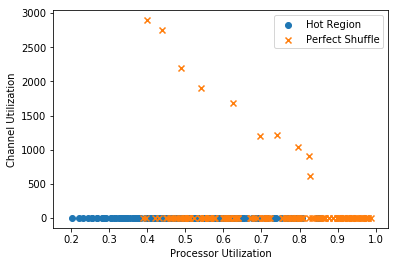

In [26]:
plt.scatter(X[160:320,0],X[160:320,1], marker='o', label='Hot Region')
plt.scatter(X[320:479,0],X[320:479,1], marker='x', label='Perfect Shuffle')

plt.xlabel('Processor Utilization')
plt.ylabel('Channel Utilization')
plt.legend()

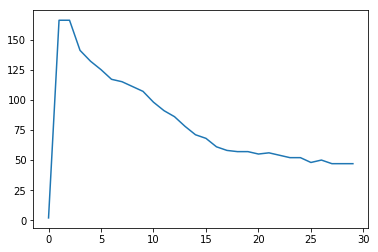

In [27]:
plt.plot(moj_perceptron_HR.errors_)

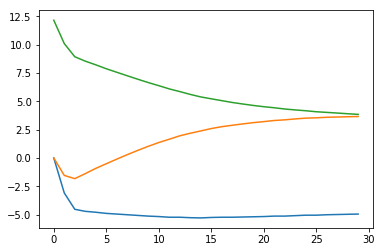

In [28]:
plt.plot(moj_perceptron_HR.vahy_to_visualize_1)
plt.plot(moj_perceptron_HR.vahy_to_visualize_2)
plt.plot(moj_perceptron_HR.vahy_to_visualize_3)